# Social dimensions of Eaton and Palisades fires
#### Week 8 - Discussion section

## About
In January 2025, Los Angeles County experienced two catastrophic fires: the Eaton and Palisades Fires. Each fire burned nearly 10,000 acres and forced thousands of residents to evacuate (Neuman, 2025). Strong Santa Ana winds intensified the fires, complicating containment efforts, as the flames not only funneled through mountain passes but also spread over ridges and into surrounding basins (Neuman, 2025). The fires caused widespread displacement, killed at least 28 people, destroyed over 16,000 structures, and inflicted significant ecological damage (Phillips, 2025).

This analysis explores the difference between spatial joins and spatial clipping when linking geospatial datasets to a reference boundary. Both methods were compared to determine which approach worked best for creating the final output: a map showcasing the population living below 200% of the poverty line in census tracts within each fire perimeter. The primary socioeconomic variable used in this analysis comes from the 2024 Environmental Justice Index (EJI) geodatabase and represents the population below 200% of the poverty line (`EPL_POV200`).

### Highlights
Three key highlights in this analysis include: 
- **Performing a spatial join and clipping can produce different results.** When an `intersects` spatial join between the census tracts and fire perimeters was performed, the output included entire census tracts that touched the fire perimeter, resulting in a larger extent. This differs from clipping, which would limit the output strictly to the area within the fire perimeter.

- **Aligning the coordinate reference system (CRS) of each geospatial object is essential for accurate geospatial analysis.** Ensuring that all datasets shared the same CRS prevents misalignment of fire perimeters and census tracts, which is critical for accurate mapping and analysis.

- **Socioeconomic impacts vary by fire and geography.** The Eaton Fire affected census tracts with higher poverty levels compared to the Palisades Fire. Additionally, areas further inland or in mountainous regions tended to show higher proportions of residents living below 200% of the poverty line.

### Data Description

This analysis utilized two datasets. The first dataset shows the burned areas for the Palisades and Eaton fires. The fire boundary shapefiles were downloaded from the [County of Los Angeles Enterprise GIS](https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about). Each fire originally had daily mapped boundaries, which were combined (dissolved) into one final outline showing the total area burned by each fire (County of Los Angeles, 2025).


The second dataset contains 2024 socioeconomic data for California, downloaded as a geodatabase from the [2024 Environmental Justice Index](https://www.atsdr.cdc.gov/place-health/php/eji/eji-data-download.html) (EJI). The dataset was downloaded from the Agency for Toxic Substances and Disease Registry and contains environmental, economic, and demographic data at the census track level. 


### Data References
Centers for Disease Control and Prevention and Agency for Toxic Substances Disease Registry. (2024). *2024 Environmental Justice Index*. [Dataset]. Accessed December 2, 2025, from 
https://atsdr.cdc.gov/place-health/php/eji/eji-data-download.html


County of Los Angeles Enterprise GIS. (2025). *Palisades and Eaton Dissolved Fire Perimeters (2025)* [Dataset]. County of Los Angeles. Accessed November 20, 2025, from 
https://egis-lacounty.hub.arcgis.com/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about

## Import and Read in Data 
Import the necessary libraries and load the fire perimeter and EJI data.

In [76]:
# Import packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd 
import xarray as xr
import matplotlib.patches as mpatches
import contextily as ctx

In [77]:
# Set up display options when looking at data frames
pd.set_option("display.max.columns", None)

# Establish EJI file path 
eji_fp = os.path.join("data", "EJI_2024_California", "EJI_2024_California.gdb")
eji = gpd.read_file(eji_fp)


# Establish file path to read in eaton shapefile
eaton_fp =os.path.join("data", "Eaton_Perimeter_20250121", "Eaton_Perimeter_20250121.shp")
eaton = gpd.read_file(eaton_fp)

# Establish file path to read in palisades shapefile
palisades_fp = os.path.join("data", "Palisades_Perimeter_20250121", "Palisades_Perimeter_20250121.shp")
palisades = gpd.read_file(palisades_fp)

## Data Exploration 
This section covers the exploration of each fire perimeter shapefile as well as the EJI Census Tracts.

In ***separate subsections***: 

a. Examine the data types of all variables in each geospatial dataset.

b. Identify the coordinate reference system (CRS) for each geospatial object, where applicable.

c. Visualize each dataset by plotting the fire perimeters and census tracts to understand their spatial extent.

#### Exploring the Eaton Fire Shapefile

In [78]:
# Explore data types, dimensions, and additional attributes
eaton.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    20 non-null     int64   
 1   type        20 non-null     object  
 2   Shape__Are  20 non-null     float64 
 3   Shape__Len  20 non-null     float64 
 4   geometry    20 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 932.0+ bytes


In [79]:
# Check the projected CRS
print(f"The CRS of the Eaton Fires shapefile is {eaton.crs.name} ({eaton.crs}).")

The CRS of the Eaton Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


Text(0.5, 1.0, 'Eaton Fire Perimeter')

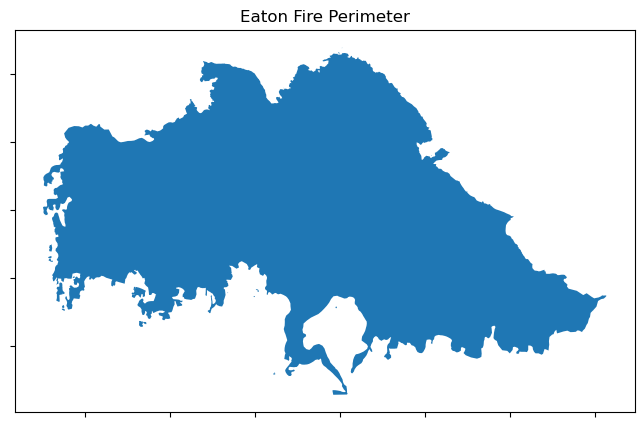

In [80]:
# Visualize Eaton fire extent 
ax = eaton.plot(figsize=(8, 8))
ax.set_xticklabels([]) # Turn off x axis
ax.set_yticklabels([])  # Turn off y axis
ax.set_title("Eaton Fire Perimeter")

#### Exploring the Palisades Fire Shapefile

In [81]:
# Explore data types, dimensions, and additional attributes
palisades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21 non-null     int64   
 1   type        21 non-null     object  
 2   Shape__Are  21 non-null     float64 
 3   Shape__Len  21 non-null     float64 
 4   geometry    21 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 972.0+ bytes


In [82]:
# Check the projected CRS
print(f"The CRS of the Palisades Fires shapefile is {palisades.crs.name} ({palisades.crs}).")

The CRS of the Palisades Fires shapefile is WGS 84 / Pseudo-Mercator (EPSG:3857).


Text(0.5, 1.0, 'Palisades Fire Perimeter')

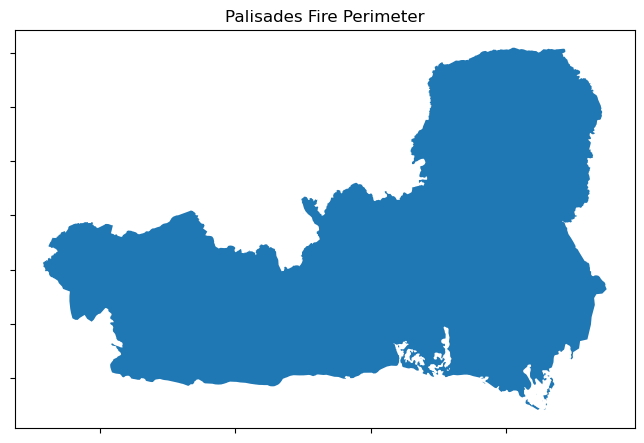

In [83]:
# Visualize Palisades fire extent 
ax = palisades.plot(figsize=(8, 8))
ax.set_xticklabels([]) # Turn off x axis
ax.set_yticklabels([])  # Turn off y axis
ax.set_title("Palisades Fire Perimeter")

#### Exploring the EJI Census Tracts

In [84]:
# Observe the first few rows 
eji.head()

,OBJECTID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY,StateDesc,STATEABBR,LOCATION,E_TOTPOP,M_TOTPOP,E_DAYPOP,SPL_EJI,RPL_EJI,SPL_SER,RPL_SER,SPL_EJI_CBM,RPL_EJI_CBM,E_MINRTY,EPL_MINRTY,SPL_SVM_DOM1,RPL_SVM_DOM1,E_POV200,EPL_POV200,E_NOHSDP,EPL_NOHSDP,E_UNEMP,EPL_UNEMP,E_RENTER,EPL_RENTER,E_HOUBDN,EPL_HOUBDN,E_UNINSUR,EPL_UNINSUR,E_NOINT,EPL_NOINT,SPL_SVM_DOM2,RPL_SVM_DOM2,E_AGE65,EPL_AGE65,E_AGE17,EPL_AGE17,E_DISABL,EPL_DISABL,E_LIMENG,EPL_LIMENG,SPL_SVM_DOM3,RPL_SVM_DOM3,E_MOBILE,EPL_MOBILE,E_GROUPQ,EPL_GROUPQ,SPL_SVM_DOM4,RPL_SVM_DOM4,SPL_SVM,RPL_SVM,E_OZONE,EPL_OZONE,E_PM,EPL_PM,E_DSLPM,EPL_DSLPM,E_TOTCR,EPL_TOTCR,SPL_EBM_DOM1,RPL_EBM_DOM1,E_NPL,EPL_NPL,E_TRI,EPL_TRI,E_TSD,EPL_TSD,E_RMP,EPL_RMP,E_COAL,EPL_COAL,E_LEAD,EPL_LEAD,SPL_EBM_DOM2,RPL_EBM_DOM2,E_PARK,EPL_PARK,E_HOUAGE,EPL_HOUAGE,E_WLKIND,EPL_WLKIND,SPL_EBM_DOM3,RPL_EBM_DOM3,E_RAIL,EPL_RAIL,E_ROAD,EPL_ROAD,E_AIRPRT,EPL_AIRPRT,SPL_EBM_DOM4,RPL_EBM_DOM4,E_IMPWTR,EPL_IMPWTR,F_IMPWTR,SPL_EBM_DOM5,RPL_EBM_DOM5,SPL_EBM,RPL_EBM,E_ASTHMA,EPL_ASTHMA,F_ASTHMA,E_CANCER,EPL_CANCER,F_CANCER,E_CHD,EPL_CHD,F_CHD,E_MHLTH,EPL_MHLTH,F_MHLTH,E_DIABETES,EPL_DIABETES,F_DIABETES,F_HVM,RPL_HVM,E_NEHD,EPL_NEHD,SPL_CBM_DOM1,RPL_CBM_DOM1,E_BURN,EPL_BURN,E_SMOKE,EPL_SMOKE,SPL_CBM_DOM2,RPL_CBM_DOM2,E_CFLD,EPL_CFLD,F_CFLD,E_DRGT,EPL_DRGT,F_DRGT,E_HRCN,EPL_HRCN,F_HRCN,E_RFLD,EPL_RFLD,F_RFLD,E_SWND,EPL_SWND,F_SWND,E_TRND,EPL_TRND,F_TRND,SPL_CBM_DOM3,RPL_CBM_DOM3,SPL_CBM,RPL_CBM,AFAM,E_AFAM,HISP,E_HISP,ASIAN,E_ASIAN,AIAN,E_AIAN,NHPI,E_NHPI,TWOMORE,E_TWOMORE,OTHERRACE,E_OTHERRACE,Tribe_PCT_Tract,Tribe_Names,Tribe_Flag,Shape_Length,Shape_Area,geometry
0,11620,06,077,005127,140000US06077005127,06077005127,06077005127,San Joaquin County,California,CA,Census Tract 51.27; San Joaquin County; Califo...,7580.0,1068.0,3339.0,1.5371,0.6422,1.5371,0.8546,1.8492,0.5249,70.6,0.7967,0.7967,0.7967,17.3653,0.2681,21.9,0.8673,6.4,0.6750,15.5,0.2331,23.4,0.4686,4.9,0.3598,7.8,0.3710,3.2429,0.4422,13.6,0.3482,28.7,0.8645,15.5,0.6721,6.7,0.8177,2.7025,0.9404,0.0,0.0000,0.2,0.4430,0.4430,0.2021,7.1851,0.5718,1.277,0.8778,4.104,0.9918,0.2628,0.6061,30.0,0.4976,2.9733,0.9343,64.5193,0.9859,86.8342,0.7837,100.0000,0.8446,0.000,0.0000,0.0,0.0,0.0,0.0,2.6142,0.9326,100.0000,0.5514,6.8,0.0690,8.5833,0.5168,1.1372,0.0961,100.0,0.8112,100.0,0.6136,0.0,0.0,1.4248,0.7208,1.000,0.8863,0,0.8863,0.8863,9.0358,0.9653,9.7,0.2505,0,4.6,0.1007,0,4.7,0.1148,0,15.9,0.3739,0,11.3,0.4116,0,0,0.0,14.2,0.6052,0.6052,0.6052,0.0,0.0,17.2,0.8897,0.8897,0.8811,0.0,0.0,1,63.3182,0.9241,9,0.0,0.0,1,0.000,0.000,0,0.0408,0.0556,9,0.0,0.0,0,0.9797,0.1184,2.4746,0.3121,467.0,6.2,2800.0,36.9,1574.0,20.8,0.0,0.0,105.0,1.4,408.0,5.4,0.0,0.0,0.0,-999,-999,5909.703135,1.962577e+06,"MULTIPOLYGON (((-2178538.439 328974.247, -2178..."
1,11557,06,077,003406,140000US06077003406,06077003406,06077003406,San Joaquin County,California,CA,Census Tract 34.06; San Joaquin County; Califo...,3768.0,698.0,2198.0,2.5815,0.9857,1.7815,0.9546,3.0313,0.9703,90.9,0.9147,0.9147,0.9147,56.6348,0.9074,32.8,0.9536,11.4,0.9053,60.9,0.8374,47.8,0.9337,7.4,0.5368,13.4,0.6229,5.6971,0.9328,14.5,0.3966,32.4,0.9446,15.7,0.6828,14.3,0.9242,2.9482,0.9832,0.0,0.0000,0.3,0.5046,0.5046,0.2494,10.0646,0.9545,0.547,0.6949,3.831,0.9906,0.2316,0.5332,30.0,0.4976,2.7163,0.8823,0.0000,0.0000,4.1081,0.4003,99.9659,0.8422,0.000,0.0000,0.0,0.0,0.0,0.0,1.2425,0.5200,100.0000,0.5514,80.1,0.7802,13.5000,0.2064,1.5380,0.3928,100.0,0.8112,100.0,0.6136,0.0,0.0,1.4248,0.7208,0.817,0.6918,0,0.6918,0.6918,7.6134,0.8270,11.8,0.8079,1,5.5,0.1978,0,8.2,0.7153,1,20.3,0.8250,1,18.0,0.9195,1,4,0.8,15.0,0.6757,0.6757,0.6757,0.0,0.0,17.2,0.8897,0.8897,0.8811,0.0,0.0,1,63.9545,0.9286,9,0.0,0.0,1,0.625,0.105,9,0.0408,0.0556,9,0.0,0.0,0,1.0892,0.1889,2.6546,0.4498,777.0,20.6,1539.0,40.8,907.0,24.1,0.0,0.0,0.0,0.0,203.0,5.4,0.0,0.0,0.0,-999,-999,3805.322542,8.541741e+05,"MULTIPOLYGON (((-2174646.947 350500.600, -2174..."
2,11594,06,077,004402,140000US06077004402,06077004402,06077004402,San Joaquin County,

In [85]:
# Explore data types, dimensions, and additional attributes
eji.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9109 entries, 0 to 9108
Columns: 174 entries, OBJECTID to geometry
dtypes: float64(147), geometry(1), int64(15), object(11)
memory usage: 12.1+ MB


Text(0.5, 1.0, 'Census Tracts')

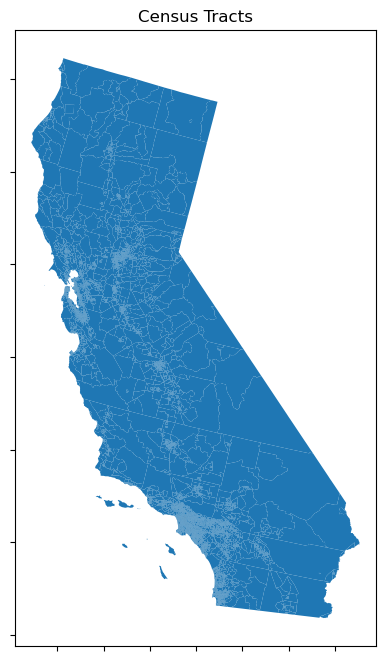

In [86]:
# Visualize Census Tracts
ax = eji.plot(figsize=(8, 8))
ax.set_xticklabels([]) # Turn off x axis
ax.set_yticklabels([])  # Turn off y axis
ax.set_title("Census Tracts")

## Section 2: Polygon Intersection
This section explores spatial joins, using the EJI data with the Palisades and Eaton fire perimeters through `sjoin()`. The next section will use clipping to compare the differences between clipping and intersection approaches.

a. Use `geopandas.sjoin()` to join the EJI data with the Palisades fire perimeter, creating a `GeoDataFrame` that contains only the census tracts intersecting the Palisades fire boundary.

In [87]:
# CRS do not match; reproject to match palisades CRS
crs_reference = palisades.crs
eji = eji.to_crs(crs_reference)

# Only include EJI census tracts that intersect the Palisades fire perimeter
eji_palisades = gpd.sjoin(eji, palisades, predicate = "intersects")

b. Create an exploratory map showcasing: 
- The census tracts intersecting the Palisades fire perimeter

- The Palisades fire perimeter itself

- **Provide a discussion on how the size of the Palisades fire perimeter compares to the surrounding census tracts**

<function matplotlib.pyplot.show(close=None, block=None)>

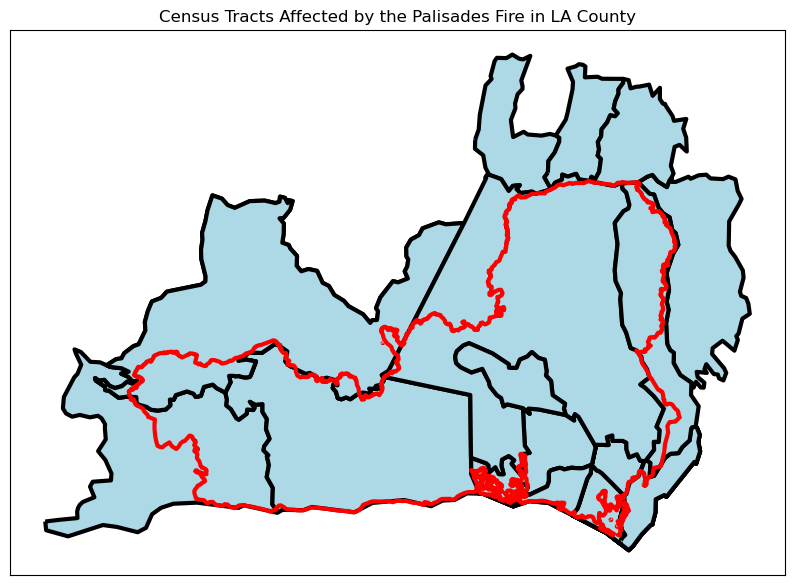

In [88]:
# Define figure and axis dimensions
fig, ax = plt.subplots(figsize = (10,8))

# Plot intersection of eji census tracts with palisades perimeter
eji_palisades.plot(ax= ax, edgecolor = "black",  facecolor = "lightblue", linewidth = 3)

# Plot palisades perimeter (outlined in red) for reference
palisades.plot(ax = ax, color = "none", edgecolor = "red", linewidth = 3)

# Set title
ax.set_title("Census Tracts Affected by the Palisades Fire in LA County")

# Turn of axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Call plot
plt.show

The `geopandas.GeoDataFrame` `eji_palisades` covers a much larger area than the Palisades fire itself. This is because the census tracts extend beyond the actual fire perimeter. The `intersects` predicate includes all census tracts that touch or overlap the perimeter, so the resulting `GeoDataFrame` reflects the full extent of all tracts that either fall within or touch the fire boundary.

c. Repeate this process to create a `geopandas.GeoDataFrame` for census tracts intersecting with the Eaton Fire perimeter and a corresponding exploratory map. **Provide a discussion on how the size of the Eaton fire perimeter compares to the surrounding census tracts.**

In [89]:
# CRS do not match; reproject to match Eaton CRS
crs_reference = eaton.crs
eji = eji.to_crs(crs_reference)

# Only include EJI census tracts that intersect the Eaton fire perimeter
eji_eaton = gpd.sjoin(eji, eaton, predicate = "intersects")

<function matplotlib.pyplot.show(close=None, block=None)>

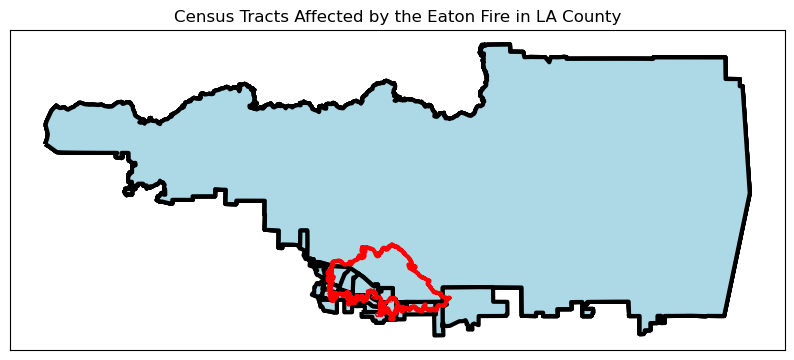

In [90]:
# Define figure and axis dimensions
fig, ax = plt.subplots(figsize = (10,8))

# Plot intersection of eji census tracts with eaton perimeter
eji_eaton.plot(ax= ax, edgecolor = "black",  facecolor = "lightblue", linewidth = 3)

# Plot eaton perimeter (outlined in red) for reference
eaton.plot(ax = ax, color = "none", edgecolor = "red", linewidth = 3)

# Set title
ax.set_title("Census Tracts Affected by the Eaton Fire in LA County")

# Turn of axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Call plot
plt.show

The `geopandas.GeoDataFrame` `eji_eaton` covers a significantly larger area than the Eaton fire itself. This is because the census tracts extend beyond the actual fire perimeter. The `intersects` predicate includes all census tracts that touch or overlap the perimeter, so the resulting `GeoDataFrame` reflects the full extent of all tracts that either fall within or touch the fire boundary.

## Polygon clipping 
An alternative to using a spatial join is clipping, which restricts one geospatial dataset to the extent of another. Here, clipping is used instead of a spatial join to limit the census tracts to the boundaries of each fire.

a. Clip the census tracts to the Palisades fire perimeter using `geopandas.clip()`, and repeat the same process for the Eaton fire perimeter.

In [91]:
# Clip the census tracts to the extent of the palisades perimeter
eji_palisades_clip = gpd.clip(eji, palisades)

In [92]:
# Clip the census tracts to the extent of the eaton perimeter
eji_eaton_clip = gpd.clip(eji, eaton)

b. Visualize the extent of the clipped census tracks compared to each fire perimeter. 

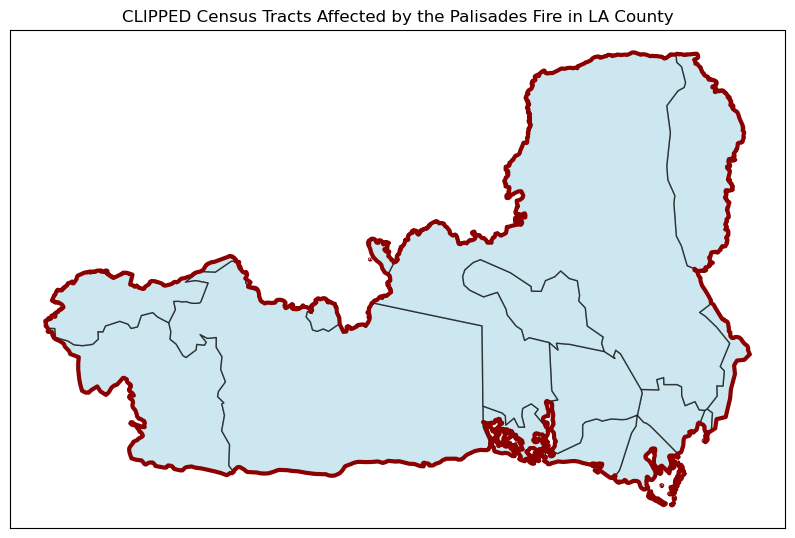

In [93]:
# Define figure and axis
fig, ax = plt.subplots(figsize = (10,8))

# Plot clipped census tracts within the Palisades fire perimeter (filled in light blue, outlined in black)
eji_palisades_clip.plot(ax = ax, facecolor = "lightblue", edgecolor = "black", linewidth = 1, alpha = .6)

# Plot palisades perimeter (outlined in dark red) for reference
palisades.plot(ax = ax, color = "none", edgecolor = "darkred", linewidth = 3)

# Set title
ax.set_title("CLIPPED Census Tracts Affected by the Palisades Fire in LA County")

# Turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Call plot
plt.show()

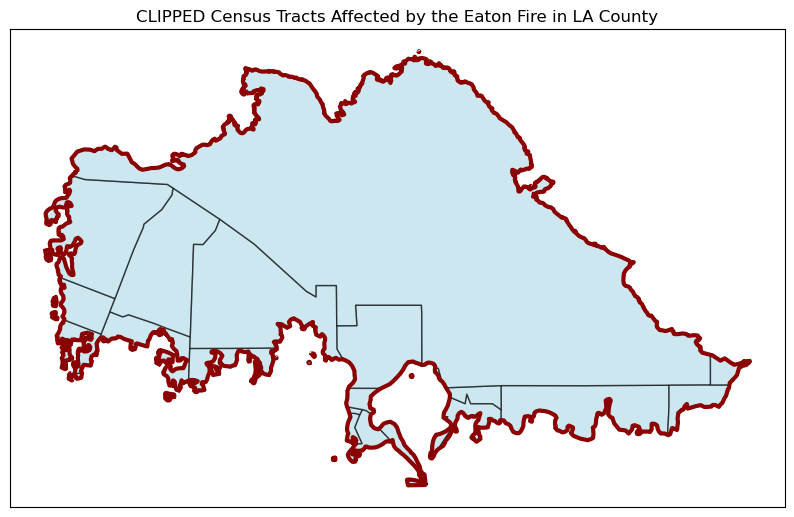

In [94]:
# Define figure and axis
fig, ax = plt.subplots(figsize = (10,8))

# Plot clipped census tracts within the Eaton fire perimeter (filled in light blue, outlined in black)
eji_eaton_clip.plot(ax = ax, facecolor = "lightblue", edgecolor = "black", linewidth = 1, alpha = .6)

# Plot eaton perimeter (outlined in dark red) for reference
eaton.plot(ax = ax, color = "none", edgecolor = "darkred", linewidth = 3)

# Set title
ax.set_title("CLIPPED Census Tracts Affected by the Eaton Fire in LA County")

# Turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Call plot
plt.show()

c. **Reflect on the differences between a spatial join and clipping. Which method is best for visualizing census tracts affected by the fires?**

A spatial join returns attributes from one or both `GeoDataFrames` based on their spatial relationship, such as whether features intersect, overlap, or are contained within one another; it merges attribute data using spatial rules. A spatial clip, on the other hand, simply limits one `GeoDataFrame` to the area defined by another. It cuts the geometries using a mask and returns only the attributes from the original dataset being clipped, without merging in new attribute information.

For visualizing census tracts based on social conditions within each fire perimeter, clipping is preferred because clipping limits the data to only the portions of census tracts that fall inside the fire boundaries, rather than including entire tracts that merely touch the perimeter. With an `intersects` spatial join, whole census tracts were returned even if only a small portion overlapped the fire area, which resulted in larger extents than the actual fire boundaries.

## Visualize fire perimeters with a basemap
Including a basemap allows the fire perimeters and census tracts to be viewed in a real-world geographic context, making the map easier to interpret. The `contextily` library was used to add a basemap to the plot.

a. Import the `contextily` library at the top of this notebook as `ctx`.

b. Create a map with an appropriate basemap to visualize the extent of each fire perimeter within LA County. Label or outline each fire in a legend, and include a clear descriptive title.

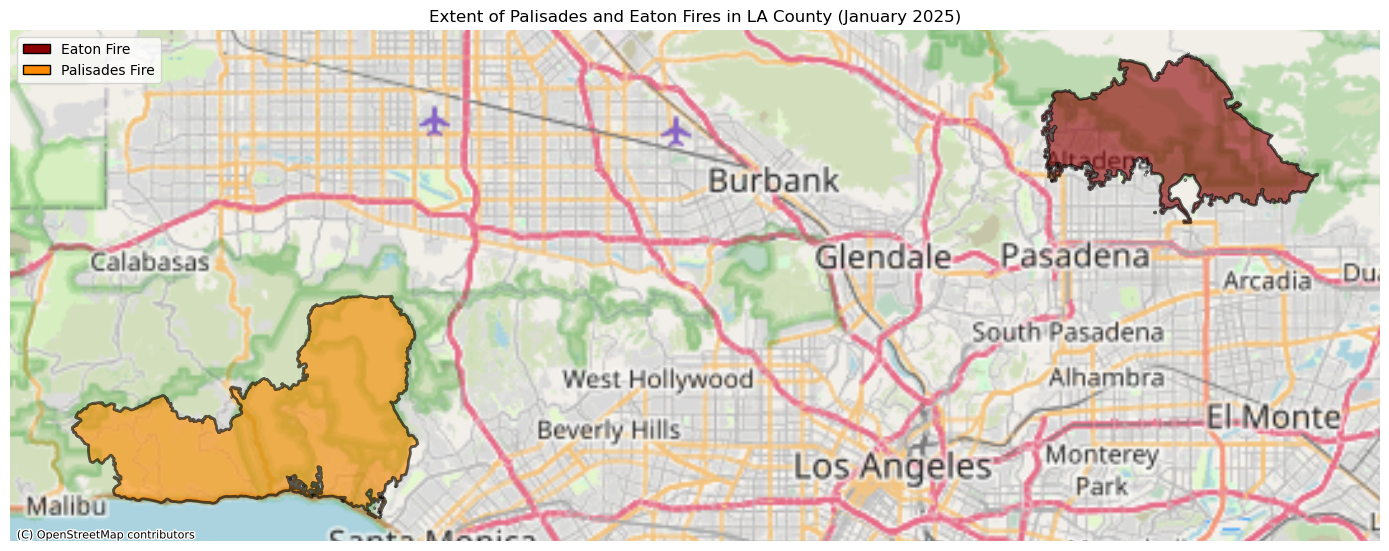

In [97]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Manually add patches for legend reference
palisades_patch = mpatches.Patch(facecolor = "darkorange", edgecolor = "black", label = "Palisades Fire")
eaton_patch = mpatches.Patch(facecolor = "darkred", edgecolor = "black", label = "Eaton Fire")


# Plot each fire perimeter
palisades.plot(ax = ax, facecolor = "darkorange", edgecolor = "black", label = "Palisades Fire", alpha = .6, linewidth= 2)
eaton.plot(ax = ax, facecolor = "darkred", edgecolor = "black", label = "Eaton Fire", alpha = .6, linewidth = 2)

# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add a legend or annotation to identify each fire
ax.legend(handles = [eaton_patch, palisades_patch], # Pass a list of patches
          loc = "upper left") # Legend placemennt

# Set an appropriate title
ax.set_title("Extent of Palisades and Eaton Fires in LA County (January 2025)")

# Turn axis off
ax.axis('off')

# Adjust spacing between plot elements so labels and titles do not overlap
plt.tight_layout()

# Show plot
plt.show()

## Mapping Environmental Justice Data in Affected Areas
By clipping the census tracts to each fire perimeter, the resulting `GeoDataFrame` was limited to the affected area, allowing the socioeconomic variable `EPL_POV200` to be correctly mapped to each census tract.

a. Create an exploratory map showcasing how the population of census tracts living below 200% of the poverty line vary within and between the Palisades and Eaton fire extents. Be sure to add a descriptive title, appropriate color palette, and figure caption (`fig.text()`). 

b. Discuss the results observed in the map.


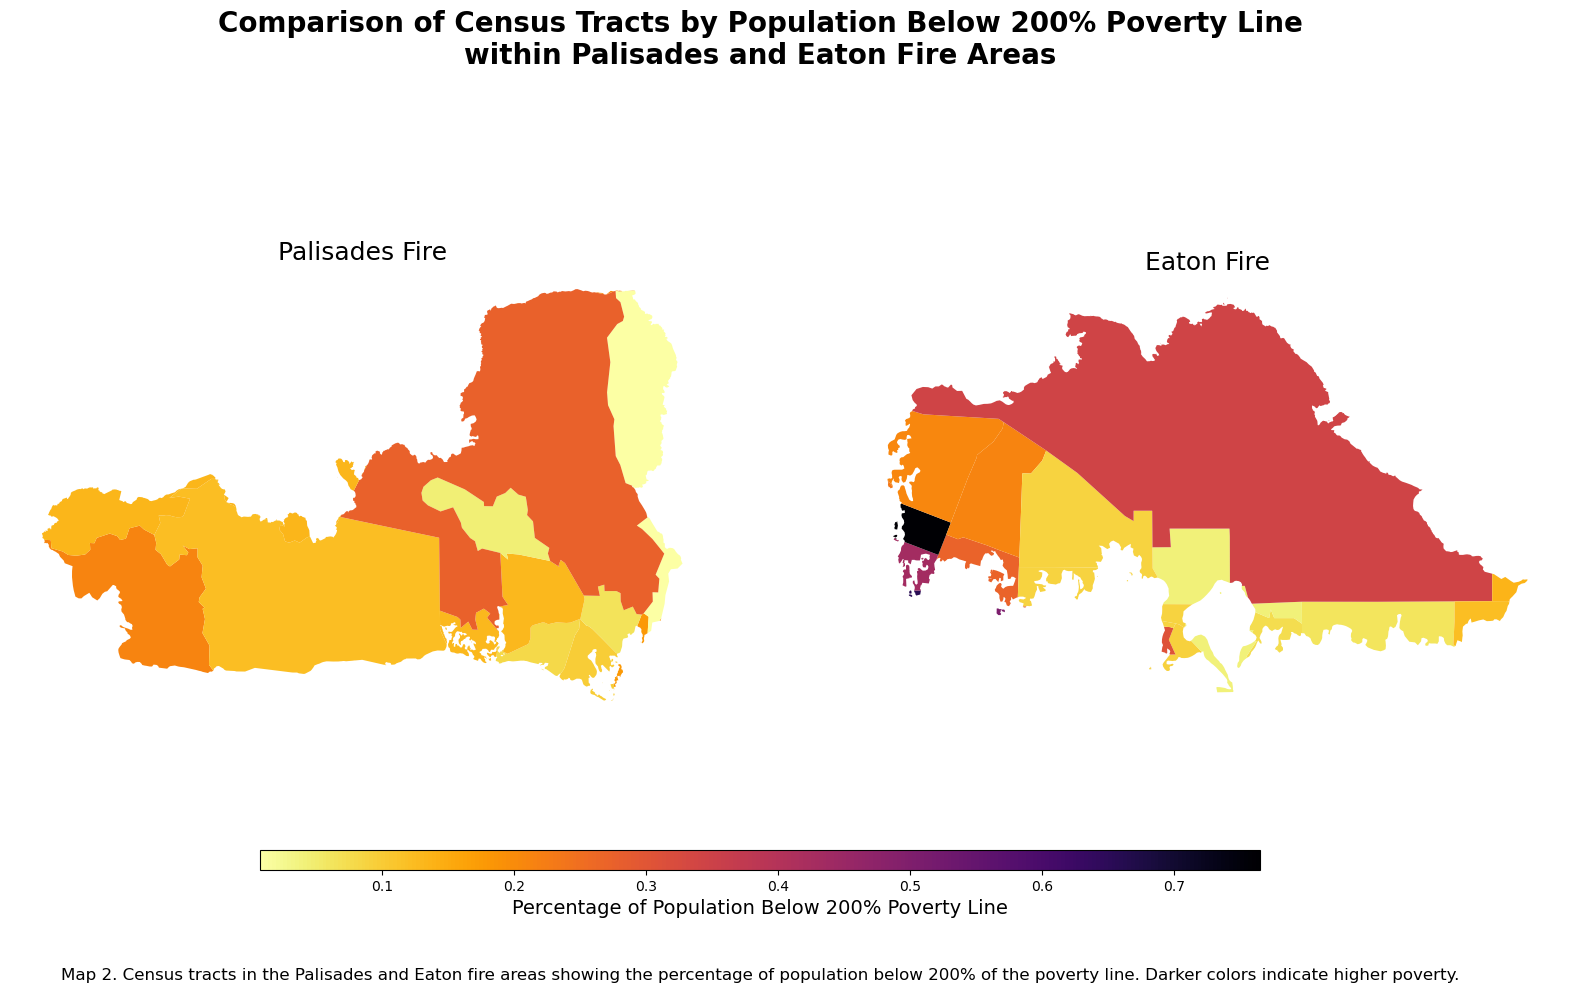

In [99]:
# Create subplots for Palisades and Eaton fires
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Update eji variable
eji_variable = 'EPL_POV200'

# Determine common min/max values for consistent color scale across both plots
vmin = min(eji_palisades_clip[eji_variable].min(), eji_eaton_clip[eji_variable].min())
vmax = max(eji_palisades_clip[eji_variable].max(), eji_eaton_clip[eji_variable].max())

# Plot clipped census tracts within Palisades fire perimeter
eji_palisades_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
    cmap="inferno_r"
)
ax1.set_title('Palisades Fire', fontsize=18)  # Larger title
ax1.axis('off')

# Plot clipped census tracts within Eaton fire perimeter
eji_eaton_clip.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
    cmap="inferno_r"
)
ax2.set_title('Eaton Fire', fontsize=18)  # Larger title
ax2.axis('off')

# Add descriptive title 
fig.suptitle(
    'Comparison of Census Tracts by Population Below 200% Poverty Line\nwithin Palisades and Eaton Fire Areas',
    fontsize=20,
    fontweight='bold'
)

# Add shared colorbar at  bottom
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap="inferno_r")
cbar_ax = fig.add_axes([0.25, 0.12, 0.5, 0.02])  # [left, bottom, width, height], adjust to raise y-axis 
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Percentage of Population Below 200% Poverty Line', fontsize=14)

# Add caption
fig.text(
    0.5, 0.01, # Adjust approximate position
    "Map 2. Census tracts in the Palisades and Eaton fire areas showing the percentage of population below 200% of the poverty line. Darker colors indicate higher poverty.",
    ha='center', # Position
    fontsize= 12 # Adjust font size
)

plt.show()

From the figure, it is evident that a higher percentage of lower-poverty communities were affected by the Palisades Fire compared to higher-poverty areas. In contrast, only a single census tract impacted by the Eaton Fire had more than 70% of its population living below 200% of the poverty line. Notably, larger census tracts tended to have at least 30-40% of residents living in poverty. This suggests that higher-income communities, often located in wealthier neighborhoods, may have been more affected by the Palisades Fire. Additionally, within the Palisades Fire extent, census tracts further from the coastline generally exhibited higher poverty rates than those closer to the coast. For the Eaton Fire, poorer census tracts were more frequently found in the mountainous regions affected by the fire. Generally, the Eaton Fire affected census tracts with higher proportions of residents living below 200% of the poverty line compared to the Palisades Fire. Overall, the analysis demonstrates that the effects of wildfires can vary significantly depending on the socioeconomic characteristics of affected communities. 